# CHAPTER10 데이터 시각화

## 10.1 다양한 그래프

### 10.1.1 꺾은선 그래프
- 평면상에 플롯된 데이터를 선으로 연결한 그래프
- 시간이나 위치 변화 추세를 시각화하기 좋다

  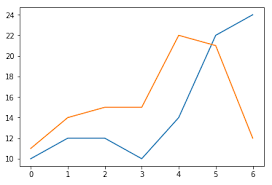

### 10.1.2 막대 그래프

- 항목을 가로축에 나열하고 해당 항목의 값을 수직으로 나타낸 그래프
- 두 개 이상의 항목을 비교하는데 적합한 시각화 방법

  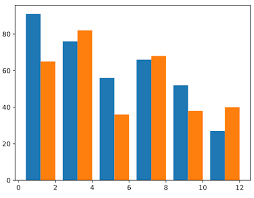

### 10.1.3 히스토그램

- 데이터를 계급별로 나눈 도수(같은 계급에 속하는 자료 수)를 시각화한 그래프
- = 도수 분포도
- 1차원 데이터(제품의 길이 측정 자료 등)의 분포를 시각화할 때 적합
  
  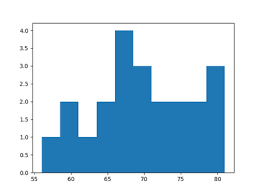

### 10.1.4 산포도

- 한 데이터의 두가지 항복을 평면상의 x축과 y룩에 각각 대응시켜 점을 찍은 그래프
- 점의 색상과 크기를 활용해 총 세 개의 항목을 평면상에 시각화 가능
  
  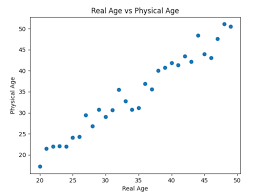

### 10.1.5 원그래프

- 전체에 대한 각 부분의 비율에 따라 중심으로부터 각도를 할당한 그래프
- 어떤 항목의 비율을 전체와 비교할 때 적합한 그래프

 ![ㅇ](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRY-J7M_QyLURSwj_FfHSsA7EOrrfW1gudwBg&usqp=CAU)

## 10.2 난수 생성

### 10.2.1 시드 설정

- 시드 : 난수 생성의 기반이 되는 설정값
- 시드값을 고정하면 동일한 난수열을 생성할 수 있다 => 같은 결과를 재현할 수 있다
- np.random.seed()

In [7]:
import numpy as np

X = np.random.randn(5)
Y = np.random.randn(5)

X,Y

(array([0.14404357, 1.45427351, 0.76103773, 0.12167502, 0.44386323]),
 array([ 0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574]))

In [9]:
np.random.seed(0)
x = np.random.randn(5)

np.random.seed(0)
y = np.random.randn(5)

x,y

(array([1.76405235, 0.40015721, 0.97873798, 2.2408932 , 1.86755799]),
 array([1.76405235, 0.40015721, 0.97873798, 2.2408932 , 1.86755799]))

### 10.2.2 정규분포에 따른 난수 생성

- np.random.randn()으로 생성한 수치를 플롯한 히스토그램은 정규분포라 불리는 식의 그래프에 가까운 형태를 하고 있다
- np.random.randn()에 정수를 전달하면 정규분포를 따르는 난수를 전달한 수만큼 반환

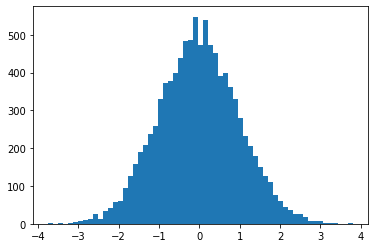

In [10]:
import matplotlib.pyplot as plt 
%matplotlib inline

np.random.seed(0)

x = np.random.randn(10000)

plt.hist(x, bins='auto')
plt.show()

### 10.2.3 이항분포에 따른 난수 생성
- np.random.binomial()은 어떤 시도의 결과로 성공과 실패 중 하나를 반환한다
- 동전던지기처럼 둘 중 하나만 나온다.
- 정수 n과 0이상1 이하의 실수 p를 전달하면 성공확률 p의 조건으로 n횟수만큼 시도한 뒤 성공한 횟수를 반환한다
- 세 번째 인수로 size='정숫값'을 전달하면 n과 p의 조건에서 이 실험을 몇번 반복할지 정숫값만큼 설정할 수 있다

In [12]:
np.random.seed(0)

nums = np.random.binomial(100,0.5, size=10000)
nums.mean()/100

0.49832

### 10.2.4 리스트에서 무작위로 선택

- np.random.choice()에 리스트형의 데이터 x와 정숫값 n을 전달하면 리스트형 데이터 중에서 랜덤으로 뽑은 결과를 전달한 정숫값만큼 반환한다
- 밑바딥에서 미니배치로 랜덤하게 데이터를 뽑을 때 이 함수를 사용하였다

In [14]:
x = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'z', 'k', 'l']

np.random.seed(0)

y = np.random.choice(x,5)
y

array(['f', 'a', 'd', 'd', 'z'], dtype='<U1')

## 10.3 시간 데이터

### 10.3.1 datetime형

- 시계열 데이터를 다룰 때 시간을 표시하는 방법
- 날짜와 시간을 처리하는 datetime 데이터형이 있다
- datetime.datetime(년,월,일,시,분,초,밀리초)를 지정하면 시각 데이터를 나타내는 datetime 객체를 돌려준다
- day=일, month=월, year=년 이렇게 별도 지정도 가능하다


In [16]:
import datetime as dt

x = dt.datetime(1992,10,22)
x

datetime.datetime(1992, 10, 22, 0, 0)

### timedelta형

- 시간의 길이를 나타내는 데이터형
- datetime.timedelta(일,초)를 지정하면 시간 데이터를 나타내는 timedelta 객체를 반환
- hours=4, minutes=10과 같이 지정하면 시간과 분을 지정할 수 있다

In [18]:
x = dt.timedelta(hours=1, minutes=30)
x

datetime.timedelta(seconds=5400)

### 10.3.3 datetime형과 timedelta형의 연산

- 두 객체는 서로 더하거나 뺄 수 있다
- timedelta형은 정수와 곱할 수 있으며, timedelta형끼리 연산할 수도 있다

In [19]:
x = dt.datetime(1992,10,22)
y = x + dt.timedelta(1)

x,y

(datetime.datetime(1992, 10, 22, 0, 0), datetime.datetime(1992, 10, 23, 0, 0))

### 10.3.4 시각을 나타내는 문자열로 datetime 객체 만들기

- datetime을 사용하여 문자열에서 datetime 객체를 생성할 수 있다
- 문자열 s가 '년-월-일 시-분-초' 형식이면 dt.datetime.strptime(s, '%Y-%m-%d %H-%M-%S')로 datetime 객체를 생성해서 반환한다

In [20]:
s = '1992-10-22'
x =  dt.datetime.strptime(s, '%Y-%m-%d')
x

datetime.datetime(1992, 10, 22, 0, 0)

## 10.4 데이터 조작


### 10.4.1 문자열을 숫자로 형 변환하기

- str형을 int,float형으로 변환

In [21]:
x = '64'
y = '16'

z = int(x) + int(y)
z

80

### 10.4.2 같은 간격의 수열 생성하기(1)

- 리스트 요소에 순서를 매기거나 짝수열만 원할 경우 np.arange()를 이용하면 편하다
- np.arange(시작값, 끝값, 간격)

In [23]:
x = np.arange(0,11,2)
x

array([ 0,  2,  4,  6,  8, 10])

### 10.4.3 같은 간격의 수열 생성하기(2)

- np.linspace(시작값, 끝값, 분할 개수) : 지정한 개수로 분할한 결과를 반환

In [25]:
x = np.linspace(0,11,5)
x

array([ 0.  ,  2.75,  5.5 ,  8.25, 11.  ])

(array([459., 466., 454., 443., 460., 460., 479., 464., 462., 442., 450.,
        456., 461., 444., 443., 461., 453., 442., 440., 427., 472., 462.]),
 array([1.46185691e-05, 4.54674925e-02, 9.09203664e-02, 1.36373240e-01,
        1.81826114e-01, 2.27278988e-01, 2.72731862e-01, 3.18184736e-01,
        3.63637610e-01, 4.09090484e-01, 4.54543358e-01, 4.99996232e-01,
        5.45449106e-01, 5.90901980e-01, 6.36354854e-01, 6.81807728e-01,
        7.27260602e-01, 7.72713476e-01, 8.18166349e-01, 8.63619223e-01,
        9.09072097e-01, 9.54524971e-01, 9.99977845e-01]),
 <a list of 22 Patch objects>)

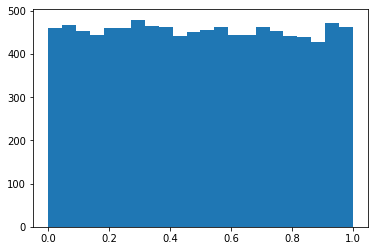

In [27]:
np.random.seed(100)

random_n_1 = np.random.rand(10000) # 균등 난수 10000개 생성
random_n_2 = np.random.randn(10000) # 정규분포 난수 10000개 생성
random_n_3 = np.random.binomial(100,0.5,size=(10000))

plt.hist(random_n_1, bins='auto')

(array([  2.,   0.,   1.,   4.,   3.,   6.,   7.,  15.,  13.,  25.,  21.,
         48.,  58.,  68.,  67., 110., 137., 152., 173., 191., 279., 301.,
        330., 379., 439., 423., 455., 522., 490., 482., 467., 461., 470.,
        456., 433., 356., 352., 299., 271., 255., 208., 166., 138., 120.,
         94.,  56.,  41.,  43.,  33.,  29.,  20.,   7.,   5.,   5.,   4.,
          3.,   1.,   3.,   2.,   0.,   1.]),
 array([-3.68342546, -3.55881358, -3.4342017 , -3.30958982, -3.18497794,
        -3.06036607, -2.93575419, -2.81114231, -2.68653043, -2.56191855,
        -2.43730667, -2.31269479, -2.18808292, -2.06347104, -1.93885916,
        -1.81424728, -1.6896354 , -1.56502352, -1.44041165, -1.31579977,
        -1.19118789, -1.06657601, -0.94196413, -0.81735225, -0.69274038,
        -0.5681285 , -0.44351662, -0.31890474, -0.19429286, -0.06968098,
         0.0549309 ,  0.17954277,  0.30415465,  0.42876653,  0.55337841,
         0.67799029,  0.80260217,  0.92721404,  1.05182592,  1.1764378 ,


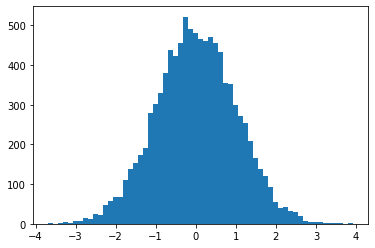

In [28]:
plt.hist(random_n_2, bins='auto')

(array([  2.,   0.,   1.,   4.,   3.,   6.,   7.,  15.,  13.,  25.,  21.,
         48.,  58.,  68.,  67., 110., 137., 152., 173., 191., 279., 301.,
        330., 379., 439., 423., 455., 522., 490., 482., 467., 461., 470.,
        456., 433., 356., 352., 299., 271., 255., 208., 166., 138., 120.,
         94.,  56.,  41.,  43.,  33.,  29.,  20.,   7.,   5.,   5.,   4.,
          3.,   1.,   3.,   2.,   0.,   1.]),
 array([-3.68342546, -3.55881358, -3.4342017 , -3.30958982, -3.18497794,
        -3.06036607, -2.93575419, -2.81114231, -2.68653043, -2.56191855,
        -2.43730667, -2.31269479, -2.18808292, -2.06347104, -1.93885916,
        -1.81424728, -1.6896354 , -1.56502352, -1.44041165, -1.31579977,
        -1.19118789, -1.06657601, -0.94196413, -0.81735225, -0.69274038,
        -0.5681285 , -0.44351662, -0.31890474, -0.19429286, -0.06968098,
         0.0549309 ,  0.17954277,  0.30415465,  0.42876653,  0.55337841,
         0.67799029,  0.80260217,  0.92721404,  1.05182592,  1.1764378 ,


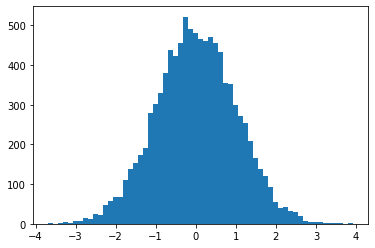

In [29]:
plt.hist(random_n_2, bins='auto')